### Week 11 In Class Assignment
#### Angela Spencer - December 1, 2021

#### 1. Explore Google Trends https://trends.google.com/ . Find a topic of interest to you with more than a year of trend data, and export it.
#### a. Import the data into a pandas dataframe

In [24]:
#dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [16]:
df = pd.read_csv("multiTimeline.csv", parse_dates=True, index_col="Week")
df.shape

(52, 1)

In [17]:
df.head()

,Fortnite
Week,
2020-12-06,87
2020-12-13,85
2020-12-20,89
2020-12-27,77
2021-01-03,64


#### b. Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset

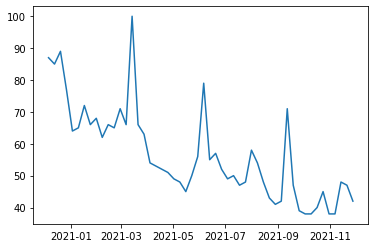

In [22]:
#data is not stationary or seasonal
plt.plot(df.index, df['Fortnite'])

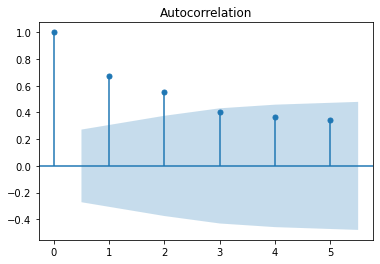

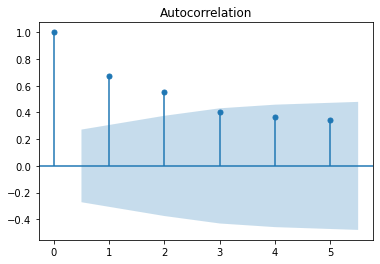

In [21]:
#autocorrelation used to estimate MA order (2)
plot_acf(df[['Fortnite']], lags=5, missing='drop')

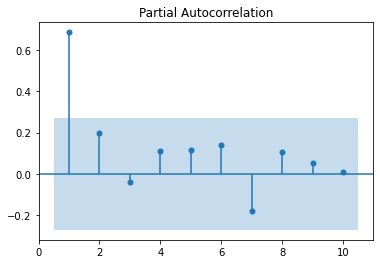

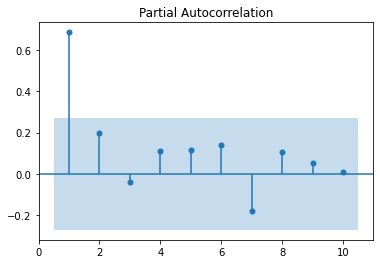

In [28]:
#PCAF used to estimate AR order (1)
plot_pacf(df[['Fortnite']], zero=False, lags = 10)

#### c. Run either an ARMA, ARIMA, or SARIMA on it

In [40]:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html
#perform ARIMA because data is not stationary and is not seasonal
model = ARIMA(df['Fortnite'], order=(1, 1, 1))

#fit the model to the data
results = model.fit()

#create a dataframe
results_df = pd.DataFrame(results.forecast(steps=10)[0])
results_df.head(3)

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-S

,0
0,38.227766
1,36.464180
2,35.372044


In [38]:
#ValueError: The computed initial AR coefficients are not stationary
#You should induce stationarity, choose a different model order, or you can
#pass your own start_params.

#### d. Explain the results

<AxesSubplot:title={'center':'Fortnite searches in United States, 10 Day Forecast'}, xlabel='Days', ylabel='Searches'>

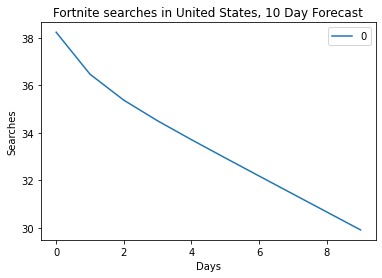

In [42]:
results_df.plot(title="Fortnite searches in United States, 10 Day Forecast", 
                xlabel = 'Days', ylabel = 'Searches')

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Fortnite   No. Observations:                   51
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -185.197
Method:                       css-mle   S.D. of innovations              8.849
Date:                Wed, 01 Dec 2021   AIC                            378.395
Time:                        21:05:01   BIC                            386.122
Sample:                    12-13-2020   HQIC                           381.348
                         - 11-28-2021                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7550      0.119     -6.322      0.000      -0.989      -0.521
ar.L1.D.Fortnite     0.3343      0.137      2.447      0.014       0.067       0.602
ma.L1.D.Fortnite    -0.9999      0.061    -16.359      0.000      -1.120      -0.880
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.9915           +0.0000j            2.9915            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

#### e. Discuss your findings with your group and explain what trend someone elsechose and why they chose the model they did.

#### 2. What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code) and explain the key elements.

https://learn.adafruit.com/fft-fun-with-fourier-transforms/background